Name: Linda Nguyen

Project Proposal: CSC400
***

# Predictive performance of the United States COVID-19 forecasting models 

***
1. Overview 

The COVID-19 pandemic has been spreading worldwide since December 2019, presenting an urgent threat to global health. Covid-19 Data Analysis Introduction The COVID-19 pandemic has been spreading worldwide, presenting an urgent threat to global health. Due to the limited understanding of disease progression and of the risk factors for the disease, it is a clinical challenge to predict which hospitalized patients will deteriorate. Nonetheless, modeling and forecasting the spread of COVID-19 remain a challenge. Here, we present and detail three regional-scale models for forecasting and assessing the course of the pandemic. This work is intended to demonstrate the utility of parsimonious models for understanding the pandemic and to provide an accessible framework for generating policy-relevant insights into its course. We show how these models can be connected to each other and to time series data for a particular region. Capable of measuring and forecasting the impacts of social distancing, these models highlight the dangers of relaxing nonpharmaceutical public health interventions in the absence of a vaccine or antiviral therapies.

2. Motivation 

The early forecasting of the number of COVID-19 cases will help to control the incubation and non-spreading of the virus, the researchers and governments depend on deep learning and machine learning (ML) which is part of artificial intelligence (AI) that can learn from the previous data to decide a solution in the real-world problem. In the COVID-19 pandemic problem, ML can predict the outbreak of COVID-19 for evaluating the riskiness of the virus and therefore raising the level of the procedures applied. The fact that we don’t know how well the model predicted, since the efficient of model prediction has highly impact on decision making for healthcare professionals. This research will use the data from https://covid19.healthdata.org/ and https://www.cdc.gov/coronavirus/2019-ncov/science/forecasting/forecasting-us.html from The national ensemble predicts to analyze how well the model did the prediction in the United States in 2021. This research will use the data and the prediction in the past and compare with the real data and measure the error of matching between the prediction and the real. 
National critical response agencies such as the US Federal Emergency Management Agency have scarce resources, including ventilators that can be moved to locations in need with sufficient notice. Longer-range forecasts are important for decisions such as the potential to open schools, universities and workplaces and under what circumstances. Much longer-range forecasts—6 months to a year—are important for a wide range of policy choices, where efforts to reduce disease transmission must be balanced against economic outcomes such as unemployment and poverty. Furthermore, vaccine and new therapeutic trialists need to select locations that will have sufficient transmission to test new products in the time frame when phase three clinical trials are ready to be launched. Nevertheless, hundreds of forecasting models have been published and/or publicly released, and it is often not immediately clear which models have had the best performance or are most appropriate for predicting a given aspect of the pandemic.  This project will help government agencies predict ahead of their emergence, considering the impact of potential future scenarios is of critical importance for planning and policy making.

By using Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data and evaluating models for usefulness / accuracy, because we aren’t just trying to see if we’re doing better than last time: we want to know if our model can actually help us solve the problems occurred during Covid-19 pandemic. The subtlety here is that evaluating whether RMSE is sufficiently small or not will depend on how accurate we need our model to be for our given application. There is never going to be a mathematical formula for this, because it depends on things like human intentions (“What are you intending to do with this model?”), risk aversion (“How much harm would be caused be if this model made a bad prediction?”). This point is crucial for making sure that hospital systems are well-prepared to handle the large influx of COVID-19 patients. When deaths reach this level, hospitals are beginning to be overwhelmed by patients.



In [1]:
from google.colab import drive
drive.mount('content/', force_remount = True)

Mounted at content/


In [2]:
root_dir = 'content/My Drive/'
!ls "$root_dir"

'Colab Notebooks'      'Skin Cancer Classification.gslides'
 CSC400		        Untitled0.ipynb
 CSC451_Project_Final  'Untitled project.gscript'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

##3.  Data sources and preprocessing

###A. Predicted dataset 

####a. The Institute for Health Metrics and Evaluation (IHME) https://www.healthdata.org/covid

  Due to predicted data on https://www.healthdata.org/covid have been update regularly, old data have been change. In order to get original predicted data, https://archive.org/ allow me to download historic data of the site https://www.healthdata.org/covid, and download the covid-19 prediction data at the time it was made by the Institute for Health Metrics and Evaluation (IHME) in 2021. The prediction divided in four sections: prediction was made from January 28 2021 to May 1 2021, from April 30 2021 to August 1 2021, from July 30 2021 to November 1 2021, from November 1 2021 to December 31 2021. The Data Release Information Sheet was included COVID-19 Mortality, Infection, Testing, Hospital Resource Use, and Social Distancing Projections for a number of countries and Global in total. The projections for total deaths, daily deaths, and daily infections and testing each include a reference scenario: Current projection, which assumes social distancing mandates are re-imposed for 6 weeks whenever daily deaths reach 8 per million (0.8 per 100k). They also include two additional scenarios: Mandates easing, which reflects continued easing of social distancing mandates, and mandates are not re-imposed; and Universal Masks, which reflects 95% mask usage in public in every location. Hospital resource use forecasts are based on the Current projection scenario. Social distancing forecasts are based on the Mandates easing scenario. These projections are produced with a model that incorporates data on observed COVID-19 deaths, hospitalizations, and cases, information about social distancing and other protective measures, mobility, and other factors. They include uncertainty intervals and are being updated daily with new data. These forecasts were developed in order to provide hospitals, policy makers, and the public with crucial information about how expected need aligns with existing resources, so that cities and countries can best prepare.

In [4]:
df_prediction_jan_28_21 = pd.read_csv(root_dir+ 'CSC400/Dataset/archive_Jan_28_2021.csv', parse_dates=True, index_col='date' )
df_prediction_jan_28_21.head()

,location_id,V1,location_name,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,...,est_infections_mean_p100k_rate,est_infections_lower_p100k_rate,est_infections_upper_p100k_rate,inf_cuml_mean,inf_cuml_upper,inf_cuml_lower,seroprev_mean,seroprev_upper,seroprev_lower,seroprev_data_type
date,,,,,,,,,,,,,,,,,,,,,
2020-02-04,1,56173,Global,13225.960350,13225.960350,13225.960350,5607.996955,5607.996955,5607.996955,3059.269733,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000072,0.000100,0.000055,projected
2020-02-05,1,56174,Global,14195.203073,14195.203073,14195.203073,6106.116322,6106.116322,6106.116322,3319.065617,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000078,0.000109,0.000060,projected
2020-02-06,1,56175,Global,15120.232295,15120.232295,15120.232295,6560.280499,6560.280499,6560.280499,3556.125812,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000085,0.000118,0.000065,projected
2020-02-07,1,56176,Global,16036.683875,16036.683875,16036.683875,6681.146838,6681.146838,6681.146838,3611.203614,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000091,0.000127,0.000070,projected
2020-02-08,1,56177,Global,16912.558284,16912.558284,16912.558284,6036.580064,6036.580064,6036.580064,3231.007401,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000097,0.000134,0.000075,projected


Since these datasets included the predicted number of world wide and of the number of countries, the predicted number of daily death of the United State under the rows have ‘location_name’ column name ‘United States of America’.  
In these datasets; from January 28 2021 to May 1 2021, from April 30 2021 to August 1 2021and from July 30 2021 to November 1 2021, the field 'deaths_mean' is the predicted number of covid-19 death daily. And in the dataset from November 1 2021 to December 31 2021 the field ‘daily_deaths_unscaled’ is the predicted number of covid-19 death daily. Variable df_US_death_predict_jan_28_21_weekly_range_frame is a table of Covid-19 death predicted by IHME from January 28, 2021 to April 30, 2021, and the death predicted per a million people


In [5]:
df_US_predict_jan_28_21 = df_prediction_jan_28_21[df_prediction_jan_28_21['location_name'] == "United States of America"]
df_US_predict_jan_28_21_weekly = df_US_predict_jan_28_21.resample('W').sum()
df_US_death_predict_jan_28_21_weekly_range = df_US_predict_jan_28_21_weekly.loc['2021-1-28':'2021-4-30','deaths_mean']
df_US_death_predict_jan_28_21_weekly_range_frame = df_US_death_predict_jan_28_21_weekly_range.to_frame().reset_index()
df_US_death_predict_jan_28_21_weekly_range_frame['death per 1M'] = df_US_death_predict_jan_28_21_weekly_range_frame['deaths_mean']/332
df_US_death_predict_jan_28_21_weekly_range_frame.head()

,date,deaths_mean,death per 1M
0,2021-01-31,20787.530146,62.613043
1,2021-02-07,19431.338834,58.528129
2,2021-02-14,18383.506532,55.372008
3,2021-02-21,17236.268438,51.916471
4,2021-02-28,15584.256388,46.940531


The same process as first set of data so we get three processed table of other three sets of data April 30 2021, July 30 2021, and November 1 2021. Then combined them in one dataset.

In [6]:
########From January 28 2021 to May 1 2021
df_prediction_jan_28_21 = pd.read_csv(root_dir+ 'CSC400/Dataset/archive_Jan_28_2021.csv', parse_dates=True, index_col='date' )

df_US_predict_jan_28_21 = df_prediction_jan_28_21[df_prediction_jan_28_21['location_name'] == "United States of America"]
df_US_predict_jan_28_21_weekly = df_US_predict_jan_28_21.resample('W').sum()
df_US_death_predict_jan_28_21_weekly_range = df_US_predict_jan_28_21_weekly.loc['2021-1-28':'2021-4-30','deaths_mean']
df_US_death_predict_jan_28_21_weekly_range_frame = df_US_death_predict_jan_28_21_weekly_range.to_frame().reset_index()
df_US_death_predict_jan_28_21_weekly_range_frame['death per 1M'] = df_US_death_predict_jan_28_21_weekly_range_frame['deaths_mean']/332

########From April 30 2021 to August 1 2021

df_prediction_apr_30_2021 = pd.read_csv(root_dir+ 'CSC400/Dataset/archive_April_30_2021.csv', parse_dates=True, index_col='date' )

df_US_predict_apr_30_2021 = df_prediction_apr_30_2021[df_prediction_apr_30_2021['location_name'] == "United States of America"]
df_US_predict_apr_30_2021_weekly = df_US_predict_apr_30_2021.resample('W').sum()

df_US_death_predict_apr_30_2021_weekly_range = df_US_predict_apr_30_2021_weekly.loc['2021-5-1':'2021-7-31','deaths_mean']
df_US_death_predict_apr_30_2021_weekly_range_frame = df_US_death_predict_apr_30_2021_weekly_range.to_frame().reset_index()
df_US_death_predict_apr_30_2021_weekly_range_frame['death per 1M'] = df_US_death_predict_apr_30_2021_weekly_range_frame['deaths_mean']/332

#######From July 30 2021 to November 1 2021

df_prediction_jul_30_2021 = pd.read_csv(root_dir+ 'CSC400/Dataset/archive_july_30_2021.csv', parse_dates=True, index_col='date' )

df_US_predict_jul_30_2021 = df_prediction_jul_30_2021[df_prediction_jul_30_2021['location_name'] == "United States of America"]
df_US_predict_jul_30_2021_weekly = df_US_predict_jul_30_2021.resample('W').sum()
df_US_death_predict_jul_30_2021_weekly_range = df_US_predict_jul_30_2021_weekly.loc['2021-8-1':'2021-10-24','deaths_mean']
df_US_death_predict_jul_30_2021_weekly_range_frame = df_US_death_predict_jul_30_2021_weekly_range.to_frame().reset_index()
df_US_death_predict_jul_30_2021_weekly_range_frame['death per 1M'] = df_US_death_predict_jul_30_2021_weekly_range_frame['deaths_mean']/333

#####From november 1 2021 to December 31 2021

df_prediction_nov_1_2021 = pd.read_csv(root_dir+ 'CSC400/Dataset/archive_october_20_2021.csv', parse_dates=True, index_col='date' )

df_US_predict_nov_1_2021 = df_prediction_nov_1_2021[df_prediction_nov_1_2021['location_name'] == "United States of America"]
df_US_predict_nov_1_2021_weekly = df_US_predict_nov_1_2021.resample('W').sum()
df_US_death_predict_nov_1_2021_weekly_range = df_US_predict_nov_1_2021_weekly.loc['2021-10-31':'2021-12-12','seir_daily_unscaled_mean']
df_US_death_predict_nov_1_2021_weekly_range_frame = df_US_death_predict_nov_1_2021_weekly_range.to_frame().reset_index()
df_US_death_predict_nov_1_2021_weekly_range_frame['death per 1M'] = df_US_death_predict_nov_1_2021_weekly_range_frame['seir_daily_unscaled_mean']/333



One we have the table of weekly data for the United States of America, I used .loc() function to filter out the death number under the field name ‘deaths_mean’ in the range of time for the prediction. And in the last table I found the number of deaths per a million people. And then the same process applied for other two dataset; dataset of prediction from April 30 2021 to August 1 2021 and dataset of prediction from July 30 2021 to November 1 2021.  Variable df_US_death_predict_jan_28_21_weekly_range_frame is a table of Covid-19 death predicted by The Institute for Health Metrics and Evaluation from January 28, 2021 to April 30, 2021, and the death predicted per a million people

In [7]:
US_predicted_death_2021 = [df_US_death_predict_jan_28_21_weekly_range_frame, df_US_death_predict_apr_30_2021_weekly_range_frame, 
                           df_US_death_predict_jul_30_2021_weekly_range_frame, df_US_death_predict_nov_1_2021_weekly_range_frame]
US_predicted_death_2021_df = pd.concat(US_predicted_death_2021)
US_predicted_death_2021_df.head(20)

,date,deaths_mean,death per 1M,seir_daily_unscaled_mean
0,2021-01-31,20787.530146,62.613043,NaN
1,2021-02-07,19431.338834,58.528129,NaN
2,2021-02-14,18383.506532,55.372008,NaN
3,2021-02-21,17236.268438,51.916471,NaN
4,2021-02-28,15584.256388,46.940531,NaN
5,2021-03-07,13982.136780,42.114870,NaN
6,2021-03-14,12528.233072,37.735642,NaN
7,2021-03-21,11179.412055,33.672928,NaN
8,2021-03-28,9963.943066,30.011877,NaN
9,2021-04-04,9255.182803,27.877057,NaN


####b.	Ensemble (https://www.cdc.gov/)
CDC works with partner Ensemble to bring together weekly forecasts based on statistical or mathematical models that aim to predict National numbers of new and total COVID-19 deaths per week.
 After collecting all predicted data from January 28, 2021 until December 12, 2021, we copy and save the “1 week ahead cum death” row in forty-six weeks into one table of dataset, which is a set of weekly data of predicted by Ensemble of Covid-19 data, this dataset would include different types of data (e.g., COVID-19 data, demographic data, mobility data), methods, and estimates of the impacts of interventions (e.g., social distancing, use of face coverings).

 In this dataset, attribute name ‘point’ is the Covid-19 death predicted by Ensemble in 2021. I also do calculation to find the number of Covid-19 deaths per a million people.


In [8]:
CDC_US_prediction_2021 = pd.read_csv(root_dir+ 'CSC400/Dataset/CDC_forcast.csv', parse_dates=True, index_col='forecast_date' )
CDC_US_prediction_2021.head()

,target,target_end_date,location_name,State,fips,point,quantile_0.025,quantile_0.25,quantile_0.75,quantile_0.975
forecast_date,,,,,,,,,,
2021-01-31,1 wk ahead inc case,2/6/2021,National,National,US,20462,16270,18991,21949,24660
2021-02-07,1 wk ahead inc case,2/13/2021,National,National,US,19686,15534,17934,20641,23350
2021-02-14,1 wk ahead inc case,2/20/2021,National,National,US,17715,13943,16452,19155,21485
2021-02-21,1 wk ahead inc case,2/27/2021,National,National,US,12321,9703,11267,13514,15531
2021-02-28,1 wk ahead inc case,3/6/2021,National,National,US,11549,8627,10249,12624,13880


To be easy to see the Covid-19 deaths predicted by Ensemble(CDC.gov) retrieved the Covid-19 deaths predicted data to another table, the attrribute that has been retrieved is in column 'Point' and normalized data per million people

In [14]:
CDC_US_prediction_2021['death_per_million'] = CDC_US_prediction_2021['point']/334

columns_CDC_US_death = [CDC_US_prediction_2021['point']]
headers_CDC_US_death = ['death predicted']
new_df_CDC_US_death = pd.concat(columns_CDC_US_death, axis = 1, keys = headers_CDC_US_death)

new_df_CDC_US_death.reset_index(inplace=True)
new_df_CDC_US_death['death_per_million'] = new_df_CDC_US_death['death predicted']/334
new_df_CDC_US_death.head()

,forecast_date,death predicted,death_per_million
0,2021-01-31,20462,61.263473
1,2021-02-07,19686,58.940120
2,2021-02-14,17715,53.038922
3,2021-02-21,12321,36.889222
4,2021-02-28,11549,34.577844


###B.	Actual dataset

For the real number of death from Covid-19, I used data collected from The Institute for Health Metrics and Evaluation, to be matched with the time frame from the prediction dataset, I went to the https://www.healthdata.org/covid/data-downloads to download the real time data, like May 6 2021, August 6 2021, October 24, 2021 and December 12, 2021. I then have the same process as predicted data, like to combine weekly data, filtered the location name of the United State of America and filter to actual death of Covid-19 number which under the attribute name ‘deaths_mean’, and calculated the death of Covid-19 number per a million people. Then combine al four sets of data to have one dataset of real death of Covid-19 number in the United States of America in 2021. There is a bit different in the dataset December 12, 2021, the actual Covid-19 deaths number is in the column 'daily_deaths_unscaled.' 

In [16]:
### May 6 2021
df_actual_may_1_2021 = pd.read_csv(root_dir+ 'CSC400/Dataset/heathdata_May_6_2021.csv', parse_dates=True, index_col='date' )

df_US_actual_may_1_2021 = df_actual_may_1_2021[df_actual_may_1_2021['location_name'] == "United States of America"]
US_actual_may_1_2021_weekly = df_US_actual_may_1_2021.resample('W').sum()

US_actual_death_may_1_2021_weekly_range = US_actual_may_1_2021_weekly.loc['2021-1-28':'2021-4-30','deaths_mean']
US_actual_death_may_1_2021_weekly_range_frame = US_actual_death_may_1_2021_weekly_range.to_frame().reset_index()
US_actual_death_may_1_2021_weekly_range_frame['death per 1M'] = US_actual_death_may_1_2021_weekly_range_frame['deaths_mean']/332

### July 31, 2021

df_actual_aug_1_2021 = pd.read_csv(root_dir+ 'CSC400/Dataset/heathdat_August_4_2021.csv', parse_dates=True, index_col='date')

df_US_actual_aug_1_2021 = df_actual_aug_1_2021[df_actual_aug_1_2021['location_name'] == "United States of America"]
US_actual_aug_1_2021_weekly = df_US_actual_aug_1_2021.resample('W').sum()
US_actual_death_aug_1_2021_weekly_range = US_actual_aug_1_2021_weekly.loc['2021-5-1':'2021-7-31','deaths_mean']
US_actual_death_aug_1_2021_weekly_range_frame = US_actual_death_aug_1_2021_weekly_range.to_frame().reset_index()
US_actual_death_aug_1_2021_weekly_range_frame['death per 1M'] = US_actual_death_aug_1_2021_weekly_range_frame['deaths_mean']/332

### October 24, 2021

df_actual_nov_1_2021 = pd.read_csv(root_dir+ 'CSC400/Dataset/heathdata_november_1_2021.csv', parse_dates=True, index_col='date' )
df_US_actual_nov_1_2021 = df_actual_nov_1_2021[df_actual_nov_1_2021['location_name'] == "United States of America"]
US_actual_nov_1_2021_weekly = df_US_actual_nov_1_2021.resample('W').sum()
US_actual_death_nov_1_2021_weekly_range = US_actual_nov_1_2021_weekly.loc['2021-8-1':'2021-10-24','daily_deaths_unscaled']
US_actual_death_nov_1_2021_weekly_range_frame = US_actual_death_nov_1_2021_weekly_range.to_frame().reset_index()
US_actual_death_nov_1_2021_weekly_range_frame['death per 1M'] = US_actual_death_nov_1_2021_weekly_range_frame['daily_deaths_unscaled']/332

### December 12, 2021

df_actual_dec_31_2021 = pd.read_csv(root_dir+ 'CSC400/Dataset/heathdata_december_31_2021.csv', parse_dates=True, index_col='date' )

df_US_actual_dec_31_2021 = df_actual_dec_31_2021[df_actual_dec_31_2021['location_name'] == "United States of America"]
US_actual_dec_31_2021_weekly = df_US_actual_dec_31_2021.resample('W').sum()
US_actual_death_dec_31_2021_weekly_range = US_actual_dec_31_2021_weekly.loc['2021-10-31':'2021-12-12','daily_deaths_unscaled']
US_actual_death_dec_31_2021_weekly_range_frame = US_actual_death_dec_31_2021_weekly_range.to_frame().reset_index()
US_actual_death_dec_31_2021_weekly_range_frame['death per 1M'] = US_actual_death_dec_31_2021_weekly_range_frame['daily_deaths_unscaled']/333

### Combine 4 sets of data
US_actual_death_2021 = [US_actual_death_may_1_2021_weekly_range_frame, US_actual_death_aug_1_2021_weekly_range_frame, US_actual_death_nov_1_2021_weekly_range_frame,
                        US_actual_death_dec_31_2021_weekly_range_frame ]
US_actual_death_2021_df =  pd.concat(US_actual_death_2021)
US_actual_death_2021_df.head(12)

,date,deaths_mean,death per 1M,daily_deaths_unscaled
0,2021-01-31,37764.950290,113.749850,NaN
1,2021-02-07,35111.451181,105.757383,NaN
2,2021-02-14,29564.055330,89.048359,NaN
3,2021-02-21,22865.033729,68.870584,NaN
4,2021-02-28,19708.402169,59.362657,NaN
5,2021-03-07,18455.984432,55.590315,NaN
6,2021-03-14,14519.640131,43.733856,NaN
7,2021-03-21,11022.683370,33.200854,NaN
8,2021-03-28,11119.739454,33.493191,NaN
9,2021-04-04,8851.626433,26.661525,NaN


##4.	Results

In the result I used plotly.graph_objects library to make a line chart, the plot represents the difference between the predicted and the reality that these model made for Covid-19 in the United States in 2021. The go.Scatter() function is the animation scatter on each curve if the mouse move over the curve the information about date and number of deaths per million people will present in a pop up box. In the chart, the solid curve represented the real Covid-19 death in the United States in 2021, the dashed curves represented the predicted of Covid-19 death in the United States in 2021, while the red dashed curve represented Covid-19 death predicted by The Institute for Health Metrics and Evaluation, the royal blue dashed curve represented Covid-19 death predicted by Ensemble of CDC.gov. The plot also shows us which model made better predicted.


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=US_predicted_death_2021_df['date'], y=US_predicted_death_2021_df['death per 1M'], name = 'US predict by healthdata.org', 
                         line=dict(color='firebrick', width=4, dash='dash')))

fig.add_trace(go.Scatter(x=CDC_US_prediction_2021.reset_index()['forecast_date'], y= CDC_US_prediction_2021['death_per_million'], name='US predicted by CDC', 
                         line=dict(color='royalblue', width=4, dash='dash')))

fig.add_trace(go.Scatter(x=US_actual_death_2021_df['date'], y= US_actual_death_2021_df['death per 1M'], 
                         name='US actual', line=dict(color='firebrick', width=4)))


fig.update_layout(title='Predicted and actual weekly deaths per 1 million people in 2021 in the United States of America',
                   xaxis_title='Date',
                   yaxis_title='Death toll')


fig.show()


Root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSE is particularly useful for comparing the fit of different models. For this project I used math and numpy libraries to calculate the root-mean-square error (RMSE). US_RMSE was a RMSE of The Institute for Health Metrics and Evaluation prediction model, CDC_RMSE was a RMSE of Ensemble model by CDC.gov. US_RMSE_R and CDC_RMSE_R were the round up after two decimal digits of two root-mean-square error of two models. After calculating, we have root-mean-square error of the Institute for Health Metrics and Evaluation Covid-19 death predicted model is 13.09, and root-mean-square error of Ensemble Covid-19 death predicted model is 23.99. From the results we can see that IHME had made less error the CDC.gov model, that means that the Institute for Health Metrics and Evaluation made better predicted than Ensemble of CDC.gov

In [18]:
import math
US_predicted_death_2021_df['different from actual'] = (US_predicted_death_2021_df['death per 1M'] - US_actual_death_2021_df['death per 1M'])**2

import numpy as np
sum_diff = US_predicted_death_2021_df['different from actual'].sum()
US_func = sum_diff/48
US_RMSE = np.sqrt(US_func)

US_RMSE_R = round(US_RMSE, 2)
print("RMSE of IHME predicted: ", US_RMSE_R)


CDC_US_prediction_2021_dif= (CDC_US_prediction_2021.reset_index()['death_per_million']  - US_actual_death_2021_df['death per 1M'])**2
sum_diff = CDC_US_prediction_2021_dif.sum()
CDC_func = sum_diff/48
CDC_RMSE = np.sqrt(CDC_func)

CDC_RMSE_R = round(CDC_RMSE, 2)
print("RMSE of the CDC predicted: ", CDC_RMSE_R)


RMSE of IHME predicted:  13.09
RMSE of the CDC predicted:  23.99


I used the pyplot library from matplotlib, 
To make the plot for RMSE of predicted models, put the two RMSE numbers of two predicted model to 1 table and plot the table  with two column IHME(healthdata.org) and Ensemble

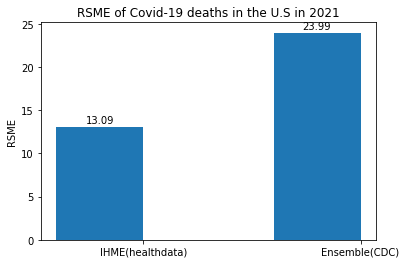

In [19]:
from matplotlib import pyplot as plt
import numpy as np

name = ['IHME(healthdata)', 'Ensemble(CDC)']
RSME = [US_RMSE_R, CDC_RMSE_R]

x = np.arange(len(name)) # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('RSME')
ax.set_title('RSME of Covid-19 deaths in the U.S in 2021')
ax.set_xticks(x)
ax.set_xticklabels(name)

pps = ax.bar(x - width/2, RSME, width, label='RSME')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 2), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.savefig('RMSE.png')
plt.show()

##Hospitalization

As Covid tranmitted rate quite high, and this is a new desease, hospitals would have a hard time to distribute their patients and Covid positive was arise on the hospitals and clinics was part of the challenge for hospitals and clinics in distrubuting the resources. In this project, I also do the comparision for the hospitalization too. The data sources and processing data for hospitalization is pretty much as same as processing Covid deaths in the U.S in 2021.

In [21]:
# Predicted data from IHME for hospitalization in the U.S in 2021
df_US_hos_predict_jan_28_21_weekly_range = df_US_predict_jan_28_21_weekly.loc['2021-1-28':'2021-4-30','admis_mean']
df_US_hos_predict_jan_28_21_weekly_range_frame = df_US_hos_predict_jan_28_21_weekly_range.to_frame().reset_index()
df_US_hos_predict_jan_28_21_weekly_range_frame['hospitalization per 1M'] = df_US_hos_predict_jan_28_21_weekly_range_frame['admis_mean']/332

df_US_hos_predict_apr_30_2021_weekly_range = df_US_predict_apr_30_2021_weekly.loc['2021-5-1':'2021-7-31','admis_mean']
df_US_hos_predict_apr_30_2021_weekly_range_frame = df_US_hos_predict_apr_30_2021_weekly_range.to_frame().reset_index()
df_US_hos_predict_apr_30_2021_weekly_range_frame['hospitalization per 1M'] = df_US_hos_predict_apr_30_2021_weekly_range_frame['admis_mean']/332

df_US_hos_predict_jul_30_2021_weekly_range = df_US_predict_jul_30_2021_weekly.loc['2021-8-1':'2021-10-30','admis_mean']
df_US_hos_predict_jul_30_2021_weekly_range_frame = df_US_hos_predict_jul_30_2021_weekly_range.to_frame().reset_index()
df_US_hos_predict_jul_30_2021_weekly_range_frame['hospitalization per 1M'] = df_US_hos_predict_jul_30_2021_weekly_range_frame['admis_mean']/332

df_US_hos_predict_nov_1_2021_weekly_range = df_US_predict_nov_1_2021_weekly.loc['2021-10-31':'2021-12-12','admis_mean']
df_US_hos_predict_nov_1_2021_weekly_range_frame = df_US_hos_predict_nov_1_2021_weekly_range.to_frame().reset_index()
df_US_hos_predict_nov_1_2021_weekly_range_frame['hospitalization per 1M'] = df_US_hos_predict_nov_1_2021_weekly_range_frame['admis_mean']/332

### Actual data from IHME for hospitalization in the U.S in 2021

US_actual_hos_may_1_2021_weekly_range = US_actual_may_1_2021_weekly.loc['2021-1-28':'2021-4-30','admis_mean']
US_actual_hos_may_1_2021_weekly_range_frame = US_actual_hos_may_1_2021_weekly_range.to_frame().reset_index()
US_actual_hos_may_1_2021_weekly_range_frame['hospitalization per 1M'] = US_actual_hos_may_1_2021_weekly_range_frame['admis_mean']/332

US_actual_hos_aug_1_2021_weekly_range = US_actual_aug_1_2021_weekly.loc['2021-5-1':'2021-7-31','admis_mean']
US_actual_hos_aug_1_2021_weekly_range_frame = US_actual_hos_aug_1_2021_weekly_range.to_frame().reset_index()
US_actual_hos_aug_1_2021_weekly_range_frame['hospitalization per 1M'] = US_actual_hos_aug_1_2021_weekly_range_frame['admis_mean']/332

US_actual_hos_nov_1_2021_weekly_range = US_actual_nov_1_2021_weekly.loc['2021-8-1':'2021-10-30','admis_mean']
US_actual_hos_nov_1_2021_weekly_range_frame = US_actual_hos_nov_1_2021_weekly_range.to_frame().reset_index()
US_actual_hos_nov_1_2021_weekly_range_frame['hospitalization per 1M'] = US_actual_hos_nov_1_2021_weekly_range_frame['admis_mean']/332

US_actual_hos_dec_31_2021_weekly_range = US_actual_dec_31_2021_weekly.loc['2021-10-31':'2021-12-12','admis_mean']
US_actual_hos_dec_31_2021_weekly_range_frame = US_actual_hos_dec_31_2021_weekly_range.to_frame().reset_index()
US_actual_hos_dec_31_2021_weekly_range_frame['hospitalization per 1M'] = US_actual_hos_dec_31_2021_weekly_range_frame['admis_mean']/332

US_predicted_hos = [df_US_hos_predict_jan_28_21_weekly_range_frame, df_US_hos_predict_apr_30_2021_weekly_range_frame, 
                    df_US_hos_predict_jul_30_2021_weekly_range_frame,df_US_hos_predict_nov_1_2021_weekly_range_frame]
US_predicted_hos_df = pd.concat(US_predicted_hos)


US_actual_hos = [US_actual_hos_may_1_2021_weekly_range_frame, US_actual_hos_aug_1_2021_weekly_range_frame, 
                 US_actual_hos_nov_1_2021_weekly_range_frame, US_actual_hos_dec_31_2021_weekly_range_frame]
US_actual_hos_df = pd.concat(US_actual_hos)

In [23]:
### CDC Predicted data for hospitalization in the U.S in 2021
CDC_US_hosp_prediction_2021 = pd.read_csv(root_dir+ 'CSC400/Dataset/CDC hospital forecast.csv', parse_dates=True, index_col='forecast_date' )
CDC_US_hosp_prediction_2021['hospital_per_million'] = CDC_US_hosp_prediction_2021['point']/334
CDC_US_hosp_prediction_2021.reset_index()

columns_CDC_US_hosp = [CDC_US_hosp_prediction_2021['point']]
headers_CDC_US_hosp = ['hospitalization predicted']
new_df_CDC_US_hosp = pd.concat(columns_CDC_US_hosp, axis = 1, keys = headers_CDC_US_hosp)

new_df_CDC_US_hosp.reset_index(inplace=True)

new_df_CDC_US_hosp['hospital per 1M'] = new_df_CDC_US_hosp['hospitalization predicted']/334

new_df_CDC_US_hosp.head()

,forecast_date,hospitalization predicted,hospital per 1M
0,2021-01-31,10686,31.994012
1,2021-02-07,7540,22.574850
2,2021-02-14,6444,19.293413
3,2021-02-21,5020,15.029940
4,2021-02-28,4728,14.155689


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=US_predicted_hos_df['date'], y=US_predicted_hos_df['hospitalization per 1M'], name = 'US predict by IHME(healthdata.org)', 
                         line=dict(color='firebrick', width=4, dash='dash')))
fig.add_trace(go.Scatter(x=US_actual_hos_df['date'], y= US_actual_hos_df['hospitalization per 1M'], 
                         name='US actual', line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=new_df_CDC_US_hosp['forecast_date'], y=new_df_CDC_US_hosp['hospital per 1M'], 
                         name='US predicted by Ensemble(CDC)', line=dict(color='royalblue', width=4, dash='dash')))

fig.update_layout(title='Predicted and actual weekly hospital per 1 million people in the United States of America in 2021',
                   xaxis_title='Date',
                   yaxis_title='Hospitalization')

fig.show()

In [24]:
import math
import numpy as np
US_predicted_hos_df['different from actual'] = (US_predicted_hos_df['hospitalization per 1M'] - US_actual_hos_df['hospitalization per 1M'])**2


sum_diff = US_predicted_hos_df['different from actual'].sum()
US_func = sum_diff/48
US_IHME_RMSE = np.sqrt(US_func)

US_IHME_RMSE_R = round(US_IHME_RMSE, 2)
print("RMSE of IHME hospitalization predicted: ", US_IHME_RMSE_R)

CDC_US_hosp_prediction_2021_dif= (new_df_CDC_US_hosp['hospital per 1M']  - US_actual_hos_df['hospitalization per 1M'])**2
sum_diff = CDC_US_hosp_prediction_2021_dif.sum()
CDC_func = sum_diff/48
CDC_hos_RMSE = np.sqrt(CDC_func)

CDC_US_hop_RMSE_R = round(CDC_hos_RMSE, 2)
print("RMSE of CDC hospitalization predicted: ", CDC_US_hop_RMSE_R)

RMSE of IHME hospitalization predicted:  84.22
RMSE of CDC hospitalization predicted:  167.31


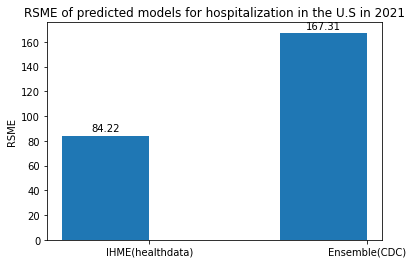

In [25]:
name = ['IHME(healthdata)', 'Ensemble(CDC)']
RSME = [US_IHME_RMSE_R, CDC_US_hop_RMSE_R]

x = np.arange(len(name)) # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('RSME')
ax.set_title('RSME of predicted models for hospitalization in the U.S in 2021')
ax.set_xticks(x)
ax.set_xticklabels(name)

pps = ax.bar(x - width/2, RSME, width, label='RSME')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 2), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.savefig('RMSE_hos.png')
plt.show()

For these scenarios, the error in the reference forecast is important to effect implied by the difference between the reference forecast and policy scenario. Unfortunately, evaluating the accuracy of these counterfactual scenarios is an extremely challenging task. The validity of such claims depends on the supporting evidence for the assumptions about a policy’s impact on transmission. The best option for decision-makers is likely to examine the impact of these policies as portrayed by a range of modelling, especially those that have historically had reasonable predictive performance in their reference forecasts.
Larger uncertainty intervals – or the range within which estimated deaths are likely to fall – can occur because of limited data availability, small studies, and conflicting data. A smaller range generally reflects extensive data availability, large studies, and data that are consistent across sources.
The date of peak daily deaths depends on the model’s projections. If the model projects that the number of daily deaths will continue to rise, then the peak will be projected for a future date. It is important to note that the data on daily deaths may fluctuate dramatically due to irregularities in reporting. Health care workers are extremely busy caring for COVID-19 patients, so they may fall behind on reporting deaths. Once health care workers catch up on their reporting, however, it may appear as though there has been a spike in daily deaths


#Texas, Florida, Connecticut

##Texas


In [ ]:
# Predicted
df_prediction_march_22_2022 = pd.read_csv(root_dir+ 'CSC400/Dataset/states_archive_march_22_2022.csv', parse_dates=True, index_col='date' )
df_TX_predict_march_22_2022 = df_prediction_march_22_2022[df_prediction_march_22_2022['location_name'] == "Texas"]
df_TX_predict_march_22_2022_weekly = df_TX_predict_march_22_2022.resample('W').sum()
df_TX_death_predict_march_22_2022_weekly_range = df_TX_predict_march_22_2022_weekly.loc['2022-3-22':'2022-5-1','seir_daily_unscaled_mean']
df_TX_death_predict_march_22_2022_weekly_range_frame = df_TX_death_predict_march_22_2022_weekly_range.to_frame().reset_index()
df_TX_death_predict_march_22_2022_weekly_range_frame['death per 100 thousand'] = df_TX_death_predict_march_22_2022_weekly_range_frame['seir_daily_unscaled_mean']/300
df_TX_death_predict_march_22_2022_weekly_range_frame.head(6)

,date,seir_daily_unscaled_mean,death per 100 thousand
0,2022-03-27,408.85,1.362833
1,2022-04-03,303.11,1.010367
2,2022-04-10,208.47,0.694900
3,2022-04-17,148.26,0.494200
4,2022-04-24,113.88,0.379600
5,2022-05-01,86.31,0.287700


In [ ]:
df_prediction_may_2022 = pd.read_csv(root_dir+ 'CSC400/Dataset/States_archive_may_22_2022.csv', parse_dates=True, index_col='date' )
df_TX_predict_may_2022 = df_prediction_may_2022[df_prediction_may_2022['location_name'] == "Texas"]
df_TX_predict_may_2022_weekly = df_TX_predict_may_2022.resample('W').sum()
df_TX_predict_may_2022_weekly_range = df_TX_predict_may_2022_weekly.loc['2022-5-2':'2022-7-1','seir_daily_unscaled_mean']
df_TX_predict_may_2022_weekly_range_frame = df_TX_predict_may_2022_weekly_range.to_frame().reset_index()
df_TX_predict_may_2022_weekly_range_frame['death per 100 thousand'] = df_TX_predict_may_2022_weekly_range_frame['seir_daily_unscaled_mean']/300
df_TX_predict_may_2022_weekly_range_frame.head(8)

,date,seir_daily_unscaled_mean,death per 100 thousand
0,2022-05-08,89.15,0.297167
1,2022-05-15,78.96,0.263200
2,2022-05-22,74.45,0.248167
3,2022-05-29,69.88,0.232933
4,2022-06-05,65.37,0.217900
5,2022-06-12,61.09,0.203633
6,2022-06-19,56.84,0.189467
7,2022-06-26,52.68,0.175600


In [ ]:
TX_predicted_may_2022 = [df_TX_death_predict_march_22_2022_weekly_range_frame, df_TX_predict_may_2022_weekly_range_frame]
TX_predicted_death_may_2022_df = pd.concat(TX_predicted_may_2022)
TX_predicted_death_may_2022_df.head(14)

,date,seir_daily_unscaled_mean,death per 100 thousand
0,2022-03-27,408.85,1.362833
1,2022-04-03,303.11,1.010367
2,2022-04-10,208.47,0.694900
3,2022-04-17,148.26,0.494200
4,2022-04-24,113.88,0.379600
5,2022-05-01,86.31,0.287700
0,2022-05-08,89.15,0.297167
1,2022-05-15,78.96,0.263200
2,2022-05-22,74.45,0.248167
3,2022-05-29,69.88,0.232933


In [ ]:
df_actual_may_6_2022 = pd.read_csv(root_dir+ 'CSC400/Dataset/states_heathdata_may_6_2022.csv', parse_dates=True, index_col='date')
df_TX_actual_may_6_2022 = df_actual_may_6_2022[df_actual_may_6_2022['location_name'] == "Texas"]
TX_actual_may_6_2022_weekly = df_TX_actual_may_6_2022.resample('W').sum()
TX_actual_death_may_6_2022_weekly_range =TX_actual_may_6_2022_weekly.loc['2022-3-22':'2022-5-1','daily_deaths_unscaled']
TX_actual_death_may_6_2022_weekly_range_frame = TX_actual_death_may_6_2022_weekly_range.to_frame().reset_index()
TX_actual_death_may_6_2022_weekly_range_frame['death per 100 thousand'] = TX_actual_death_may_6_2022_weekly_range_frame['daily_deaths_unscaled']/300
TX_actual_death_may_6_2022_weekly_range_frame.head(6)

,date,daily_deaths_unscaled,death per 100 thousand
0,2022-03-27,575.17,1.917233
1,2022-04-03,359.34,1.197800
2,2022-04-10,245.00,0.816667
3,2022-04-17,120.66,0.402200
4,2022-04-24,186.33,0.621100
5,2022-05-01,88.00,0.293333


In [ ]:
df_actual_july_2022 = pd.read_csv(root_dir+ 'CSC400/Dataset/States_healthdat_july_1_2022.csv', parse_dates=True, index_col='date')
df_TX_actual_july_2022 = df_actual_july_2022[df_actual_july_2022['location_name'] == "Texas"]
TX_actual_july_2022_weekly = df_TX_actual_july_2022.resample('W').sum()
TX_actual_july_2022_weekly_range =TX_actual_july_2022_weekly.loc['2022-5-2':'2022-7-1','daily_deaths_unscaled']
TX_actual_july_2022_weekly_range_frame = TX_actual_july_2022_weekly_range.to_frame().reset_index()
TX_actual_july_2022_weekly_range_frame['death per 100 thousand'] = TX_actual_july_2022_weekly_range_frame['daily_deaths_unscaled']/300
TX_actual_july_2022_weekly_range_frame.head(8)

,date,daily_deaths_unscaled,death per 100 thousand
0,2022-05-08,42.0,0.140000
1,2022-05-15,35.0,0.116667
2,2022-05-22,41.0,0.136667
3,2022-05-29,38.0,0.126667
4,2022-06-05,43.0,0.143333
5,2022-06-12,51.0,0.170000
6,2022-06-19,39.0,0.130000
7,2022-06-26,0.0,0.000000


In [ ]:
TX_actual_death_july_2022 = [TX_actual_death_may_6_2022_weekly_range_frame, TX_actual_july_2022_weekly_range_frame]
TX_actual_death_july_2022_df = pd.concat(TX_actual_death_july_2022)
TX_actual_death_july_2022_df.head(14)

,date,daily_deaths_unscaled,death per 100 thousand
0,2022-03-27,575.17,1.917233
1,2022-04-03,359.34,1.197800
2,2022-04-10,245.00,0.816667
3,2022-04-17,120.66,0.402200
4,2022-04-24,186.33,0.621100
5,2022-05-01,88.00,0.293333
0,2022-05-08,42.00,0.140000
1,2022-05-15,35.00,0.116667
2,2022-05-22,41.00,0.136667
3,2022-05-29,38.00,0.126667


In [ ]:
CDC_predicted_TX_death_2022 = pd.read_csv(root_dir+ 'CSC400/Dataset/CDC_texas_death.csv', parse_dates=True, index_col='forecast_date')
columns_CDC_TX_death = [CDC_predicted_TX_death_2022['point']]
headers_CDC_TX_death = ['Texas death predicted']
df_CDC_TX_death_predicted_2022 = pd.concat(columns_CDC_TX_death, axis = 1, keys = headers_CDC_TX_death)
df_CDC_TX_death_predicted_2022.reset_index(inplace=True)
df_CDC_TX_death_predicted_2022['death predicted per 100 thousand'] = df_CDC_TX_death_predicted_2022['Texas death predicted']/300

df_CDC_TX_death_predicted_2022.head()

,forecast_date,Texas death predicted,death predicted per 100 thousand
0,2022-03-27,445,1.483333
1,2022-04-03,264,0.880000
2,2022-04-10,264,0.880000
3,2022-04-17,135,0.450000
4,2022-04-24,106,0.353333


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=TX_predicted_death_may_2022_df['date'], y=TX_predicted_death_may_2022_df['death per 100 thousand'], name = 'Texas deaths predicted by IHME(healthdata.org)', 
                         line=dict(color='firebrick', width=4, dash='dash')))
fig.add_trace(go.Scatter(x=TX_actual_death_july_2022_df['date'], y= TX_actual_death_july_2022_df['death per 100 thousand'], 
                         name='Texas deaths actual', line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=df_CDC_TX_death_predicted_2022['forecast_date'], y=df_CDC_TX_death_predicted_2022['death predicted per 100 thousand'], 
                         name='Texas deaths predicted by Ensemble(CDC)', line=dict(color='royalblue', width=4, dash='dash')))

fig.update_layout(title='Predicted and actual weekly deaths per 100 thousand people in Texas in 2022',
                   xaxis_title='Date',
                   yaxis_title='Deaths')

fig.show()

I used math and numpy libraries to calculate the RMSE of these predicted models. There is one more column 'different from actual' has been added to each predicted table of two predicted models to compute the different of actual from predicted of the deaths per a 100 thousand people. Then I computed to the power of two of the abtraction of the difference numbers I just computed. The sum_diff variable is the sum up of all the numbers in the column 'different from actual', then I divided to 14 is the number of weeks that I process in this project for 2022. .sqrt() is a math function in pandas to calculate the RMSE of these predicted models.

In [ ]:
import math
import numpy as np
TX_predicted_death_may_2022_df['different from actual'] = (TX_predicted_death_may_2022_df['death per 100 thousand'] - TX_actual_death_july_2022_df['death per 100 thousand'])**2

sum_diff = TX_predicted_death_may_2022_df['different from actual'].sum()
TX_func = sum_diff/14
TX_IHME_RMSE = np.sqrt(TX_func)

TX_death_IHME_RMSE_R = round(TX_IHME_RMSE, 2)
print("RMSE of Texas deaths predicted by IHME: ", TX_death_IHME_RMSE_R)

df_CDC_TX_death_predicted_2022= (df_CDC_TX_death_predicted_2022['death predicted per 100 thousand'] -TX_actual_death_july_2022_df['death per 100 thousand'])**2
sum_diff = df_CDC_TX_death_predicted_2022.sum()
CDC_func = sum_diff/14
TX_CDC_RMSE = np.sqrt(CDC_func)

TX_death_CDC_RMSE_R = round(TX_CDC_RMSE, 2)
print("RMSE of Texas deaths predicted by CDC: ", TX_death_CDC_RMSE_R)

RMSE of Texas deaths predicted by IHME:  0.2
RMSE of Texas deaths predicted by CDC:  0.5


Ensemble forecasts combine diverse independent team forecasts into one forecast. While they have been among the most reliable forecasts in performance over time, even the ensemble forecasts have not reliably predicted rapid changes in the trends of reported cases, hospitalizations, and deaths. They should not be relied upon for making decisions about the possibility or timing of rapid changes in trends. Some forecasts are not shown in periods of low reliability

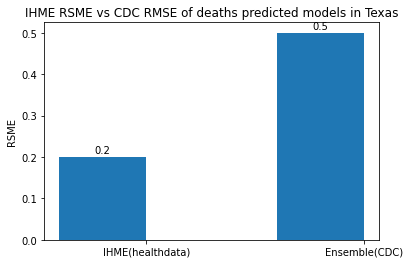

In [ ]:
name = ['IHME(healthdata)', 'Ensemble(CDC)']
RSME = [TX_death_IHME_RMSE_R, TX_death_CDC_RMSE_R]

x = np.arange(len(name))
width = 0.4 

fig, ax = plt.subplots()

ax.set_ylabel('RSME')
ax.set_title('IHME RSME vs CDC RMSE of deaths predicted models in Texas')
ax.set_xticks(x)
ax.set_xticklabels(name)

pps = ax.bar(x - width/2, RSME, width, label='RSME')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 2), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.savefig('RMSE_tx.png')
plt.show()

###Florida

In [ ]:
# predicted
df_FL_predict_march_22_2022 = df_prediction_march_22_2022[df_prediction_march_22_2022['location_name'] == "Florida"]
df_FL_predict_march_22_2022_weekly = df_FL_predict_march_22_2022.resample('W').sum()
df_FL_death_predict_march_22_2022_weekly_range = df_FL_predict_march_22_2022_weekly.loc['2022-3-22':'2022-5-1','seir_daily_unscaled_mean']
df_FL_death_predict_march_22_2022_weekly_range_frame = df_FL_death_predict_march_22_2022_weekly_range.to_frame().reset_index()
df_FL_death_predict_march_22_2022_weekly_range_frame['death per 100 thousand'] = df_FL_death_predict_march_22_2022_weekly_range_frame['seir_daily_unscaled_mean']/220

df_FL_predicted_may_2022 = df_prediction_may_2022[df_prediction_may_2022['location_name'] == "Florida"]
df_FL_death_predicted_may_2022_weekly = df_FL_predicted_may_2022.resample('W').sum()
df_FL_death_predicted_may_2022_weekly_range = df_FL_death_predicted_may_2022_weekly.loc['2022-5-2':'2022-7-1','seir_daily_unscaled_mean']
df_FL_death_predicted_may_2022_weekly_range_frame = df_FL_death_predicted_may_2022_weekly_range.to_frame().reset_index()
df_FL_death_predicted_may_2022_weekly_range_frame['death per 100 thousand'] = df_FL_death_predicted_may_2022_weekly_range_frame['seir_daily_unscaled_mean']/220

FL_death_predicted_2022 = [df_FL_death_predict_march_22_2022_weekly_range_frame,df_FL_death_predicted_may_2022_weekly_range_frame]
FL_death_predicted_2022_df = pd.concat(FL_death_predicted_2022)
FL_death_predicted_2022_df.head()

,date,seir_daily_unscaled_mean,death per 100 thousand
0,2022-03-27,320.82,1.458273
1,2022-04-03,219.72,0.998727
2,2022-04-10,145.11,0.659591
3,2022-04-17,101.03,0.459227
4,2022-04-24,76.50,0.347727


In [ ]:
# actual
df_FL_actual_may_6_2022 = df_actual_may_6_2022[df_actual_may_6_2022['location_name'] == "Florida"]
FL_actual_may_6_2022_weekly = df_FL_actual_may_6_2022.resample('W').sum()
FL_actual_death_may_6_2022_weekly_range =FL_actual_may_6_2022_weekly.loc['2022-3-22':'2022-5-6','daily_deaths_unscaled']
FL_actual_death_may_6_2022_weekly_range_frame = FL_actual_death_may_6_2022_weekly_range.to_frame().reset_index()
FL_actual_death_may_6_2022_weekly_range_frame['death per 100 thousand'] = FL_actual_death_may_6_2022_weekly_range_frame['daily_deaths_unscaled']/220

df_FL_actual_july_2022 = df_actual_july_2022[df_actual_july_2022['location_name'] == "Florida"]
FL_actual_july_2022_weekly = df_FL_actual_july_2022.resample('W').sum()
FL_actual_july_2022_weekly_range =FL_actual_july_2022_weekly.loc['2022-5-2':'2022-7-1','daily_deaths_unscaled']
FL_actual_july_2022_weekly_range_frame = FL_actual_july_2022_weekly_range.to_frame().reset_index()
FL_actual_july_2022_weekly_range_frame['death per 100 thousand'] = FL_actual_july_2022_weekly_range_frame['daily_deaths_unscaled']/220

FL_actual_death_2022 = [FL_actual_death_may_6_2022_weekly_range_frame, FL_actual_july_2022_weekly_range_frame]
FL_actual_death_2022_df = pd.concat(FL_actual_death_2022)
FL_actual_death_2022_df.head(14)

,date,daily_deaths_unscaled,death per 100 thousand
0,2022-03-27,525.50,2.388636
1,2022-04-03,267.40,1.215455
2,2022-04-10,198.20,0.900909
3,2022-04-17,152.66,0.693909
4,2022-04-24,130.99,0.595409
5,2022-05-01,133.33,0.606045
0,2022-05-08,120.87,0.549409
1,2022-05-15,135.52,0.616000
2,2022-05-22,133.80,0.608182
3,2022-05-29,129.50,0.588636


In [ ]:
# Florida death by CDC predicted
CDC_FL_death_predicted_2022 = pd.read_csv(root_dir+ 'CSC400/Dataset/CDC_florida_death.csv', parse_dates=True, index_col='forecast_date')
columns_CDC_FL_death = [CDC_FL_death_predicted_2022['point']]
headers_CDC_FL_death = ['Texas death predicted']
df_CDC_FL_death_predicted_2022 = pd.concat(columns_CDC_FL_death, axis = 1, keys = headers_CDC_FL_death)
df_CDC_FL_death_predicted_2022.reset_index(inplace=True)
df_CDC_FL_death_predicted_2022['death predicted per 100 thousand'] = df_CDC_FL_death_predicted_2022['Texas death predicted']/220

df_CDC_FL_death_predicted_2022.head()

,forecast_date,Texas death predicted,death predicted per 100 thousand
0,2022-03-27,330,1.500000
1,2022-04-03,190,0.863636
2,2022-04-10,164,0.745455
3,2022-04-17,100,0.454545
4,2022-04-24,82,0.372727


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=FL_death_predicted_2022_df['date'], y=FL_death_predicted_2022_df['death per 100 thousand'], name = 'Florida deaths predicted by IHME(healthdata.org)', 
                         line=dict(color='firebrick', width=4, dash='dash')))
fig.add_trace(go.Scatter(x=FL_actual_death_2022_df['date'], y= FL_actual_death_2022_df['death per 100 thousand'], 
                         name='Florida death actual', line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= df_CDC_FL_death_predicted_2022['forecast_date'], y= df_CDC_FL_death_predicted_2022['death predicted per 100 thousand'], 
                         name='Florida deaths predicted by Ensemble(CDC)', line=dict(color='royalblue', width=4, dash='dash')))

fig.update_layout(title='Predicted and actual weekly deaths per 100 thousand people in Florida in 2022',
                   xaxis_title='Date',
                   yaxis_title='Deaths')

fig.show()

In [ ]:
import math
import numpy as np
FL_death_predicted_2022_df['different from actual'] = (FL_death_predicted_2022_df['death per 100 thousand'] - FL_actual_death_2022_df['death per 100 thousand'])**2

sum_diff = FL_death_predicted_2022_df['different from actual'].sum()
FL_func = sum_diff/14
FL_IHME_RMSE = np.sqrt(FL_func)

FL_death_IHME_RMSE_R = round(FL_IHME_RMSE, 2)
print("RMSE of Florida deaths predicted by IHME: ", FL_death_IHME_RMSE_R)

df_CDC_FL_death_predicted_2022= (df_CDC_FL_death_predicted_2022['death predicted per 100 thousand'] -FL_actual_death_2022_df['death per 100 thousand'])**2
sum_diff = df_CDC_FL_death_predicted_2022.sum()
CDC_func = sum_diff/14
FL_CDC_RMSE = np.sqrt(CDC_func)

FL_death_CDC_RMSE_R = round(FL_CDC_RMSE, 2)
print("RMSE of Florida deaths predicted by CDC: ", FL_death_CDC_RMSE_R)

RMSE of Florida deaths predicted by IHME:  0.43
RMSE of Florida deaths predicted by CDC:  0.61


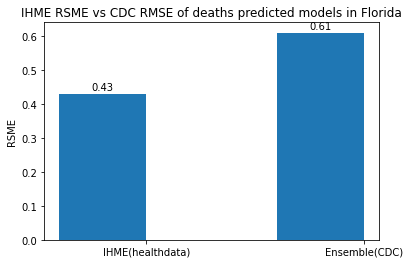

In [ ]:
name = ['IHME(healthdata)', 'Ensemble(CDC)']
RSME = [FL_death_IHME_RMSE_R, FL_death_CDC_RMSE_R]

x = np.arange(len(name))
width = 0.4 

fig, ax = plt.subplots()

ax.set_ylabel('RSME')
ax.set_title('IHME RSME vs CDC RMSE of deaths predicted models in Florida')
ax.set_xticks(x)
ax.set_xticklabels(name)

pps = ax.bar(x - width/2, RSME, width, label='RSME')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 2), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.savefig('RMSE_fl.png')
plt.show()

### Connecticut death

In [ ]:
# Predicted death by IHME
df_CN_predict_march_22_2022 = df_prediction_march_22_2022[df_prediction_march_22_2022['location_name'] == "Connecticut"]
df_CN_predict_march_22_2022_weekly = df_CN_predict_march_22_2022.resample('W').sum()
df_CN_death_predict_march_22_2022_weekly_range = df_CN_predict_march_22_2022_weekly.loc['2022-3-22':'2022-5-6','seir_daily_unscaled_mean']
df_CN_death_predict_march_22_2022_weekly_range_frame = df_CN_death_predict_march_22_2022_weekly_range.to_frame().reset_index()
df_CN_death_predict_march_22_2022_weekly_range_frame['death per 100 thousand'] = df_CN_death_predict_march_22_2022_weekly_range_frame['seir_daily_unscaled_mean']/36

df_CN_predicted_may_2022 = df_prediction_may_2022[df_prediction_may_2022['location_name'] == "Connecticut"]
df_CN_death_predicted_may_2022_weekly = df_CN_predicted_may_2022.resample('W').sum()
df_CN_death_predicted_may_2022_weekly_range = df_CN_death_predicted_may_2022_weekly.loc['2022-5-2':'2022-7-1','seir_daily_unscaled_mean']
df_CN_death_predicted_may_2022_weekly_range_frame = df_CN_death_predicted_may_2022_weekly_range.to_frame().reset_index()
df_CN_death_predicted_may_2022_weekly_range_frame['death per 100 thousand'] = df_CN_death_predicted_may_2022_weekly_range_frame['seir_daily_unscaled_mean']/36

CN_death_predicted_2022 = [df_CN_death_predict_march_22_2022_weekly_range_frame, df_CN_death_predicted_may_2022_weekly_range_frame]
CN_death_predicted_2022_df = pd.concat(CN_death_predicted_2022)
CN_death_predicted_2022_df.head()

,date,seir_daily_unscaled_mean,death per 100 thousand
0,2022-03-27,62.60,1.738889
1,2022-04-03,52.67,1.463056
2,2022-04-10,38.66,1.073889
3,2022-04-17,30.22,0.839444
4,2022-04-24,27.85,0.773611


In [ ]:
# Predicted death by CDC
CDC_CN_death_predicted_2022 = pd.read_csv(root_dir+ 'CSC400/Dataset/CDC_connecticut_death.csv', parse_dates=True, index_col='forecast_date')
CDC_CN_death_predicted_2022['death predicted per 100 thousand'] = CDC_CN_death_predicted_2022['point']/36
columns_CDC_CN_death = [CDC_CN_death_predicted_2022['point']]
headers_CDC_CN_death = ['Texas death predicted']
df_CDC_CN_death_predicted_2022 = pd.concat(columns_CDC_CN_death, axis = 1, keys = headers_CDC_CN_death)
df_CDC_CN_death_predicted_2022.reset_index(inplace=True)
df_CDC_CN_death_predicted_2022['death predicted per 100 thousand'] = df_CDC_CN_death_predicted_2022['Texas death predicted']/36

df_CDC_CN_death_predicted_2022.head()

,forecast_date,Texas death predicted,death predicted per 100 thousand
0,2022-03-27,47,1.305556
1,2022-04-03,39,1.083333
2,2022-04-10,27,0.750000
3,2022-04-17,20,0.555556
4,2022-04-24,17,0.472222


In [ ]:
# Actual death
df_CN_actual_may_6_2022 = df_actual_may_6_2022[df_actual_may_6_2022['location_name'] == "Connecticut"]
CN_actual_may_6_2022_weekly = df_CN_actual_may_6_2022.resample('W').sum()
CN_actual_death_may_6_2022_weekly_range =CN_actual_may_6_2022_weekly.loc['2022-3-22':'2022-5-6','daily_deaths_unscaled']
CN_actual_death_may_6_2022_weekly_range_frame = CN_actual_death_may_6_2022_weekly_range.to_frame().reset_index()
CN_actual_death_may_6_2022_weekly_range_frame['death per 100 thousand'] =CN_actual_death_may_6_2022_weekly_range_frame['daily_deaths_unscaled']/36

df_CN_actual_july_2022 = df_actual_july_2022[df_actual_july_2022['location_name'] == "Florida"]
CN_actual_july_2022_weekly = df_CN_actual_july_2022.resample('W').sum()
CN_actual_july_2022_weekly_range =CN_actual_july_2022_weekly.loc['2022-5-2':'2022-7-1','daily_deaths_unscaled']
CN_actual_july_2022_weekly_range_frame = CN_actual_july_2022_weekly_range.to_frame().reset_index()
CN_actual_july_2022_weekly_range_frame['death per 100 thousand'] = CN_actual_july_2022_weekly_range_frame['daily_deaths_unscaled']/220

CN_actuak_death_2022 = [CN_actual_death_may_6_2022_weekly_range_frame, CN_actual_july_2022_weekly_range_frame]
CN_actuak_death_2022_df = pd.concat(CN_actuak_death_2022)
CN_actuak_death_2022_df.head()

,date,daily_deaths_unscaled,death per 100 thousand
0,2022-03-27,48.00,1.333333
1,2022-04-03,20.00,0.555556
2,2022-04-10,12.66,0.351667
3,2022-04-17,11.33,0.314722
4,2022-04-24,21.00,0.583333


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=CN_death_predicted_2022_df['date'], y=CN_death_predicted_2022_df['death per 100 thousand'], name = 'Connecticut deaths predicted by IHME', 
                         line=dict(color='firebrick', width=4, dash='dash')))
fig.add_trace(go.Scatter(x=CN_actuak_death_2022_df['date'], y= CN_actuak_death_2022_df['death per 100 thousand'], 
                         name='Connecticut deaths actual', line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= df_CDC_CN_death_predicted_2022['forecast_date'], y= df_CDC_CN_death_predicted_2022['death predicted per 100 thousand'], 
                         name='Connecticut deaths predicted by Ensemble', line=dict(color='royalblue', width=4, dash='dash')))

fig.update_layout(title='Predicted and actual weekly deaths per 100 thousand people in Connecticut in 2022',
                   xaxis_title='Date',
                   yaxis_title='Deaths')

fig.show()

In [ ]:
# CONNECTICUT RMSE
CN_death_predicted_2022_df['different from actual'] = (CN_death_predicted_2022_df['death per 100 thousand'] - CN_actuak_death_2022_df['death per 100 thousand'])**2

sum_diff = CN_death_predicted_2022_df['different from actual'].sum()
CN_func = sum_diff/14
CN_IHME_RMSE = np.sqrt(CN_func)

CN_death_IHME_RMSE_R = round(CN_IHME_RMSE, 2)

CDC_CN_death_predicted_22 = (df_CDC_CN_death_predicted_2022['death predicted per 100 thousand'] - CN_actuak_death_2022_df['death per 100 thousand'])**2
sum_diff = CDC_CN_death_predicted_22.sum()
CDC_func = sum_diff/14
CN_death_CDC_RMSE = np.sqrt(CDC_func)

CN_death_CDC_RMSE_R = round(CN_death_CDC_RMSE, 2)


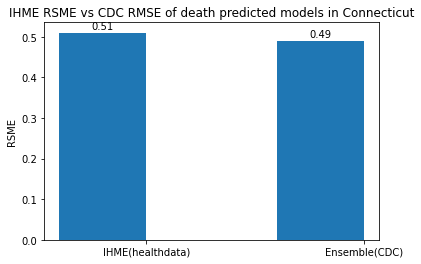

In [ ]:
name = ['IHME(healthdata)', 'Ensemble(CDC)']
RSME = [CN_death_IHME_RMSE_R, CN_death_CDC_RMSE_R]

x = np.arange(len(name))
width = 0.4 

fig, ax = plt.subplots()

ax.set_ylabel('RSME')
ax.set_title('IHME RSME vs CDC RMSE of death predicted models in Connecticut')
ax.set_xticks(x)
ax.set_xticklabels(name)

pps = ax.bar(x - width/2, RSME, width, label='RSME')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 2), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.savefig('RMSE_cn.png')
plt.show()

In [ ]:
##Connecticut hospitalization


##5.	Conclusions and challenges. 

This analysis of the performance of publicly released COVID-19 forecasting models has limitations. First, I have focused only on forecasts of deaths, as they are available for all models included here. Hospital resource use is also of critical importance, however, and deserves future consideration. Nevertheless, this will be complicated by the heterogeneity in hospital data reporting; many jurisdictions report hospital census counts, others report hospital admissions, and still others do not release hospital data on a regular basis. Without a standardized source for these data, assessment of performance can only be undertaken
in an ad hoc way. Second, many performance metrics exist, which could have been computed for this analysis. We have focused on reporting median absolute percent error, as the metric is frequently used, quite stable and provides an easily interpreted number that can be communicated to a wide audience. The relative error is an exacting standard, however. For example, a forecast of three deaths in a location that observed only one may represent a 200% error, yet it would be of little policy or planning significance. Conversely, focusing on absolute error would create an assessment dominated by a limited number of locations with large epidemics. Future assessment could consider different metrics that may offer new insights, although the relative rank of performance by the model is likely to be similar.
The total magnitude of COVID-19 deaths is a key measure for monitoring the progression of the pandemic. It represents the most commonly produced outcome of COVID-19 forecasting models, and perhaps the most widely debated measure of performance. The main quantity that is considered is errors in total cumulative deaths—as opposed to other metrics such as weekly or daily deaths—as it has been the most commonly discussed measure, to date, in academic and popular press critiques of COVID-19 forecasting models. Nevertheless, alternate measures are presented in the Supplementary. Errors were assessed for systematic upward or downward bias, and errors for weekly, rather than cumulative deaths, were also assessed. In calculating summary statistics, percent errors were used to control for the large differences in the scale of the epidemic between locations. Medians, rather than means, are calculated due to a small number of large-magnitude outliers present in a few time series. Errors from all models were pooled to calculate overall summary statistics, in order to comment on overarching trends by geography and time.
We have learned that not all deaths due to COVID-19 that occur at home or in nursing homes have been attributed to COVID-19. As awareness increases, the number of reported deaths is growing, with some locations now reporting presumptive COVID-19 deaths. Another challenge is that COVID-19 death data fluctuate substantially each day, with some locations reporting more deaths on Tuesdays than on Sundays and Mondays. We believe this variation is due to data reporting practices instead of actual death patterns. To mitigate the impact of inconsistent reporting on our forecasts, our published predictions are based on averaging multiple iterations of projections. As new data emerges, we incorporate it into our model, and our projections will shift up or down in response to the data.
Due to the limitation of Covid-19 predicted model, I have focused in the United States of America only. In the future, we could find another different model to have more comparation. Project could be expanded for other country not only the United States of America like Germany, Brazin, Peru, etc. 


#References
* Joseph Friedman, Patrick Liu, Christopher E. Troeger, Austin Carter, Robert C. Reiner Jr ,Ryan M. Barber, James Collins, Stephen S. Lim, David M. Pigott , Theo Vos, Simon I. Hay ,Christopher J. L. Murray5 & Emmanuela Gakidou, “Predictive performance of international COVID-19mortality forecasting models”. https://doi.org/10.1038/s41467-021-22457-w 2022.
* Omer Noy, Dan Coster, Maya Metzger , ItaiAtar , Shani Shenhar Tsarfaty, Shlomo Berliner, Galia Rahav, Ori Rogowski & Ron Shamir, “A machine learning model for predicting deterioration of COVID 19 inpatients.”  https://www.nature.com/ 2022.
